In [3]:

%matplotlib inline
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import sys
from operator import itemgetter
from IPython.core.display import HTML
pd.set_option('display.max_rows', 5000)

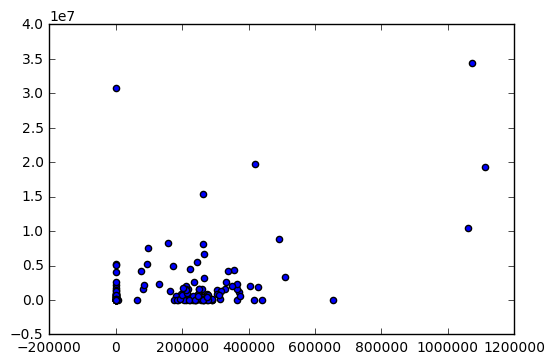

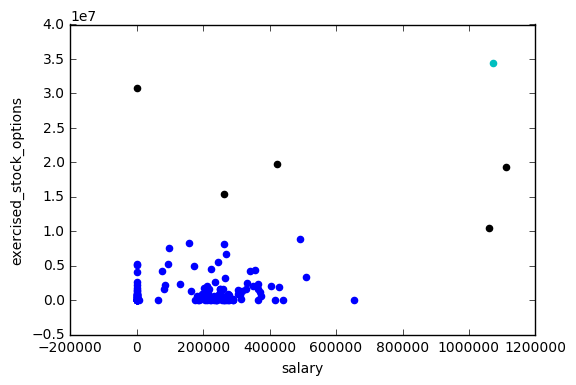

In [10]:

sys.path.append("../ud120-projects/tools/")
from feature_format import featureFormat, targetFeatureSplit




def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../ud120-projects/final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2,feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2,_ in finance_features:
    plt.scatter( f1, f2 )
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(data)

pred = kmeans.predict(data)


### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

In [18]:
max(data[:,2])

34348384.0

In [19]:
min(data[:,2])

0.0

In [29]:
data_dict['ALLEN PHILLIP K']['exercised_stock_options']

1729541

In [59]:
data_dict['ALLEN PHILLIP K']

{'bonus': 4175000,
 'deferral_payments': 2869717,
 'deferred_income': -3081055,
 'director_fees': 'NaN',
 'email_address': 'phillip.allen@enron.com',
 'exercised_stock_options': 1729541,
 'expenses': 13868,
 'from_messages': 2195,
 'from_poi_to_this_person': 47,
 'from_this_person_to_poi': 65,
 'loan_advances': 'NaN',
 'long_term_incentive': 304805,
 'other': 152,
 'poi': False,
 'restricted_stock': 126027,
 'restricted_stock_deferred': -126027,
 'salary': 201955,
 'shared_receipt_with_poi': 1407,
 'to_messages': 2902,
 'total_payments': 4484442,
 'total_stock_value': 1729541}

In [60]:
import math

ma = 0
mi = 9999999
for i in data_dict.values():
    if not i['exercised_stock_options'] == 'NaN':
        #print(i['exercised_stock_options'])
        ma = max(ma,i['exercised_stock_options'] )
        mi = min(mi,i['exercised_stock_options'] )

print 'max ' + str(ma)
print 'min ' + str(mi)

max 34348384
min 3285


In [2]:
(1000000.0-3285.0)/(34348384.0-3285.0)

0.029020588934683227

In [62]:
import math

ma = 0
mi = 9999999
for i in data_dict.values():
    if not i['salary'] == 'NaN':
        #print(i['salary'])
        ma = max(ma,i['salary'] )
        mi = min(mi,i['salary'] )

print 'max ' + str(ma)
print 'min ' + str(mi)

max 1111258
min 477


In [1]:
(200000.0-477.0)/(1111258.0-477.0)

0.17962406631010072